In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'w'
from scipy.stats import binom as binomial
from scipy.special import beta

In [3]:
n_samples = 10000
# p = np.random.random(n_samples)
p_axis = np.linspace(0, 1, n_samples)
prob_prior= np.repeat(1, n_samples)
prob_data = binomial.pmf(6, 9, p_axis)
posterior = prob_data * prob_prior
posterior /= np.sum(posterior)

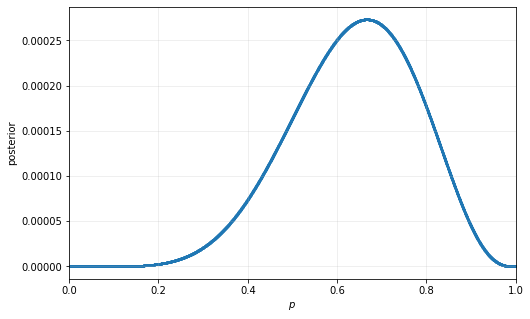

In [4]:
fig, ax = plt.subplots(figsize=(8, 5))

xmin, xmax = 0, 1
ax.scatter(p_axis, posterior, s=1)# color='dodgerblue', alpha=.7, histtype='stepfilled', ec='k')
ymin, ymax = ax.axis()[-2:]
ax.set(xlabel='$p$', ylabel='posterior', xlim=[xmin,xmax], ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0);

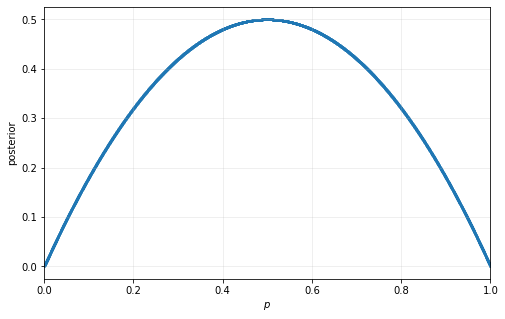

In [5]:
fig, ax = plt.subplots(figsize=(8, 5))

xmin, xmax = 0, 1
ax.scatter(p_axis, np.linspace(1, 0, 10000)*2 * np.linspace(0, 1, 10000), s=1)# color='dodgerblue', alpha=.7, histtype='stepfilled', ec='k')
ymin, ymax = ax.axis()[-2:]
ax.set(xlabel='$p$', ylabel='posterior', xlim=[xmin,xmax], ylim=[ymin,ymax])
ax.grid(lw=1, alpha=0.2, zorder=0);

In [6]:
def likelihood(W, L, p):
    return np.math.factorial(W+L) / (np.math.factorial(W) * np.math.factorial(L)) * p**W * (1-p)**L

def likelihood_water(W, N, p):
    return np.math.factorial(N) / (np.math.factorial(W) * np.math.factorial(N-W)) * p**W * (1-p)**(N-W)

def posterior_water(W, N, p):
    post = prob_prior * likelihood_water(W=W, N=N, p=p) / (np.math.factorial(N) / (np.math.factorial(W) * np.math.factorial(N-W)) * beta(W+1, N-W+1))
    # if N > 0:
    #     L = N - W
    #     for i in range(1, W+1):
    #         print(i)
    #         post = post * likelihood_water(W=i, N=i, p=p)
    #     for i in range(1, L+1):
    #         print(f'[{i}]')
    #         post = post * likelihood_water(W=0, N=W+i, p=p)
    # post = post / np.sum(post)
    return post

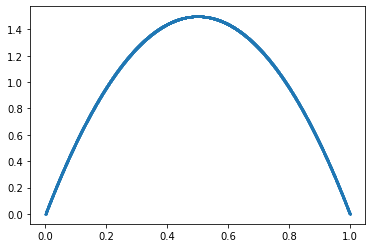

In [9]:
plt.scatter(p_axis, posterior_water(W=1, N=2, p=p_axis), s=1);

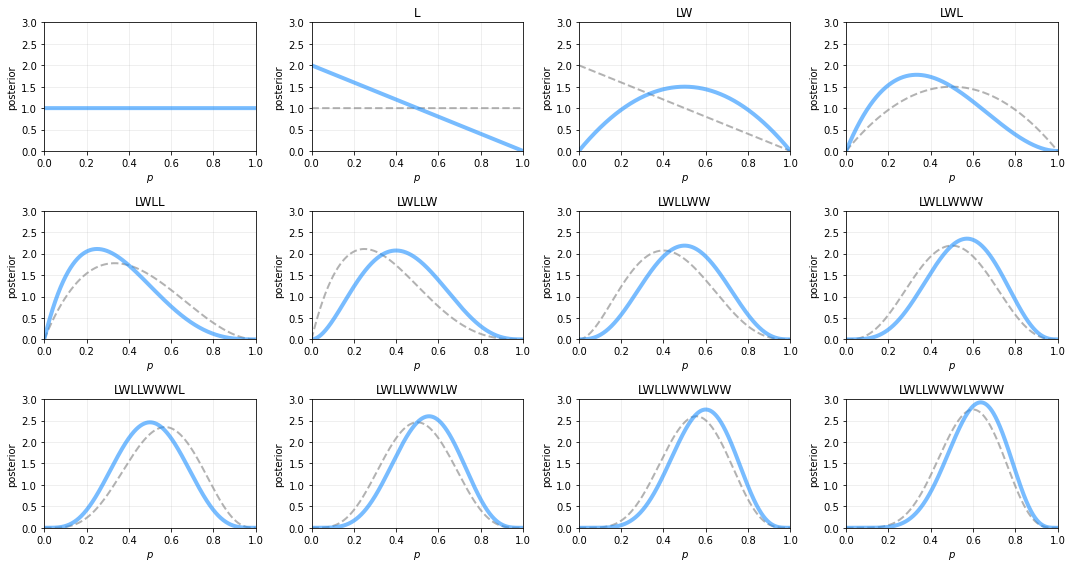

In [19]:
fig, axs = plt.subplots(figsize=(15, 8), ncols=4, nrows=3)
seq = ['L', 'W', 'L', 'L', 'W', 'W', 'W', 'L', 'W', 'W', 'W']
xmin, xmax = 0, 1
ymin, ymax = 0, 3
cnt_all, cnt_water = 0, 0
sequence = ''
for idx, ax in enumerate(axs.flat):
    if idx != 0:
        sample = seq[idx-1]
        if sample == 'W':
            cnt_water += 1
        cnt_all += 1
        sequence += sample
        ax.plot(p_axis, last_posterior, c='gray', ls='--', lw=2, alpha=0.6)
    last_posterior = posterior_water(W=cnt_water, N=cnt_all, p=p_axis)
    ax.plot(p_axis, last_posterior, c='dodgerblue', lw=4, alpha=0.6)
    ax.set(xlabel='$p$', ylabel='posterior', title=f'{sequence}', 
           xlim=[xmin,xmax], ylim=[ymin,ymax])
    ax.grid(lw=1, alpha=0.2, zorder=0)
plt.tight_layout()